In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import networkx as nx

In [ ]:
traincsv = pd.read_csv('train.csv')

In [ ]:
traincsv.head(5)

In [ ]:
#my_graph = nx.read_edgelist(path='train_noheader.csv',
                 #           delimiter=',',
                 #           create_using=nx.DiGraph(),
                 #           nodetype=int)

In [ ]:
G = nx.from_pandas_edgelist(traincsv.head(100), 'source_node', "destination_node", create_using=nx.DiGraph())

In [ ]:
print(nx.info(G))

In [ ]:
nx.draw(G)
plt.savefig("graph_sample.pdf")

# ---------------------------------------------------------------------------------------------------------------

In [64]:
# intialise data of lists.
data = {'S':[3,3,4,4,5,5,6,6,1, 2, 1, 2, 1, 2,200,2],
        'D': [1,2,1,2,1,2,1,2,99,99,88,88,77,77,1,1000]}
  
# Create DataFrame
df = pd.DataFrame(data)
df

,S,D
0,3,1
1,3,2
2,4,1
3,4,2
4,5,1
5,5,2
6,6,1
7,6,2
8,1,99
9,2,99


In [65]:
g2 = nx.from_pandas_edgelist(df, 'S', "D", create_using=nx.DiGraph())

In [66]:
print(nx.info(g2))

Name: 
Type: DiGraph
Number of nodes: 11
Number of edges: 16
Average in degree:   1.4545
Average out degree:   1.4545


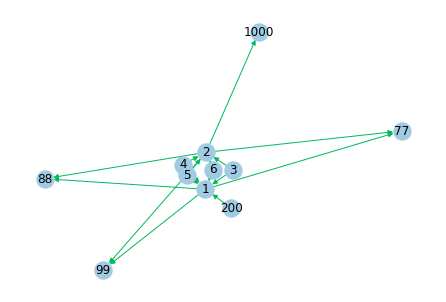

In [67]:
pos=nx.spring_layout(g2)
nx.draw(g2, pos, node_color='#A0CBE2', edge_color='#00bb5e', width=1, edge_cmap=plt.cm.Blues, with_labels=True)

In [70]:
set(g2.successors(1))

{77, 88, 99}

In [69]:
set(g2.successors(2))

{77, 88, 99, 1000}

In [32]:
def jaccard_for_followees(graph,a,b):
    train_graph = graph
    try:
        if len(set(train_graph.successors(a))) == 0  | len(set(train_graph.successors(b))) == 0:
            return 0
        sim = (len(set(train_graph.successors(a)).intersection(set(train_graph.successors(b)))))/\
                                    (len(set(train_graph.successors(a)).union(set(train_graph.successors(b)))))
    except:
        return 0
    return sim

In [71]:
jaccard_for_followees(g2, 1,2)   # 0.75 jaccard dist for followees means 1 and 2 both follows similar people.

0.75

In [72]:
set(g2.predecessors(1))

{3, 4, 5, 6, 200}

In [73]:
set(g2.predecessors(2))

{3, 4, 5, 6}

In [26]:
def jaccard_for_followers(graph,a,b):
    train_graph = graph
    try:
        if len(set(train_graph.predecessors(a))) == 0  | len(set(train_graph.predecessors(b))) == 0:
            print("true")
            return 0
        sim = (len(set(train_graph.predecessors(a)).intersection(set(train_graph.predecessors(b)))))/(len(set(train_graph.predecessors(a)).union(set(train_graph.predecessors(b)))))
        return sim
    except:
        print("except")
        return 0

In [76]:
jaccard_for_followers(g2, 1,2)   # 0.8 jaccard dist for followers means 1 and 2 both followed by similar people.

0.8

In [1]:
import numpy as np

In [9]:
(1/np.log10(5000)) + (1/np.log10(6000))

0.5350252443147144

In [5]:
0.37+0.49

0.86

In [18]:
# intialise data of lists.
data = {'S':[1,1,3,3],
        'D': [2,3,2,4]}
  
# Create DataFrame
df2 = pd.DataFrame(data)
df2

,S,D
0,1,2
1,1,3
2,3,2
3,3,4


In [19]:
g3 = nx.from_pandas_edgelist(df2, 'S', "D", create_using=nx.DiGraph())

In [20]:
print(nx.info(g3))

Name: 
Type: DiGraph
Number of nodes: 4
Number of edges: 4
Average in degree:   1.0000
Average out degree:   1.0000


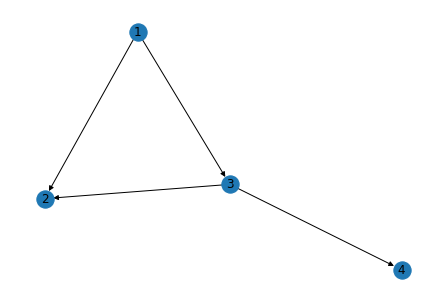

In [21]:
nx.draw(g3, with_labels=True)